<a href="https://colab.research.google.com/github/jiheon2234/test/blob/main/SentenceBERT_%ED%95%9C%EA%B5%AD%EC%96%B4_%EB%AC%B8%EC%9E%A5_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SentenceBERT 한국어 문장 클러스터링

유튜브 [빵형의 개발도상국](https://www.youtube.com/c/%EB%B9%B5%ED%98%95%EC%9D%98%EA%B0%9C%EB%B0%9C%EB%8F%84%EC%83%81%EA%B5%AD)

## GPU 사용 확인

메뉴 - 런타임 - 런타임 유형 변경 - 하드웨어 가속기 - GPU 확인

In [ ]:
!nvidia-smi

Wed Apr 20 06:03:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    36W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Sentence Transformers 패키지 설치

In [ ]:
!pip install -q -U sentence-transformers

     |████████████████████████████████| 79 kB 3.2 MB/s 
     |████████████████████████████████| 4.0 MB 26.6 MB/s 
     |████████████████████████████████| 1.2 MB 40.0 MB/s 
     |████████████████████████████████| 77 kB 6.7 MB/s 
     |████████████████████████████████| 6.6 MB 34.1 MB/s 
     |████████████████████████████████| 596 kB 37.4 MB/s 
     |████████████████████████████████| 895 kB 50.7 MB/s 


## 문장 임베딩

한국어 문장 -> 숫자 벡터로 변환하기

https://huggingface.co/jhgan/ko-sroberta-multitask

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('jhgan/ko-sroberta-multitask')

sentences = ["안녕하세요?", "한국어 문장 임베딩을 위한 버트 모델입니다."]
embeddings = model.encode(sentences)

print(embeddings)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.86k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/744 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/123 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/931 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/302 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/156 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/495k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/585 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/248k [00:00<?, ?B/s]

[[-0.37510464 -0.7733837   0.5927709  ...  0.5792355   0.32683504
  -0.65089625]
 [-0.0936171  -0.18191506 -0.1923085  ... -0.03165798  0.30412573
  -0.26793632]]


## 클러스터링 샘플 코드

In [ ]:
from sklearn.cluster import KMeans

# Corpus with example sentences
sentences = ['한 남자가 음식을 먹는다.',
          '한 남자가 빵 한 조각을 먹는다.',
          '그 여자가 아이를 돌본다.',
          '한 남자가 말을 탄다.',
          '한 여자가 바이올린을 연주한다.',
          '두 남자가 수레를 숲 속으로 밀었다.',
          '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.',
          '원숭이 한 마리가 드럼을 연주한다.',
          '치타 한 마리가 먹이 뒤에서 달리고 있다.',
          '한 남자가 파스타를 먹는다.',
          '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.',
          '치타가 들판을 가로 질러 먹이를 쫓는다.']

embeddings = model.encode(sentences)

# Then, we perform k-means clustering using sklearn:
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(sentences[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['치타 한 마리가 먹이 뒤에서 달리고 있다.', '치타가 들판을 가로 질러 먹이를 쫓는다.']

Cluster  2
['한 남자가 말을 탄다.', '두 남자가 수레를 숲 속으로 밀었다.', '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.']

Cluster  3
['한 남자가 음식을 먹는다.', '한 남자가 빵 한 조각을 먹는다.', '한 남자가 파스타를 먹는다.']

Cluster  4
['한 여자가 바이올린을 연주한다.', '원숭이 한 마리가 드럼을 연주한다.', '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.']

Cluster  5
['그 여자가 아이를 돌본다.']



# 스팀 리뷰 크롤링

### [옵션1] 빵형이 미리 크롤링한거 다운로드

'엘든링 리뷰 임베딩'으로 이동

https://github.com/kairess/KoSentenceBERT-SKT/raw/main/eldenring_stream_reviews_ko.csv

In [ ]:
import pandas as pd

df = pd.read_csv('https://github.com/kairess/KoSentenceBERT-SKT/raw/main/eldenring_stream_reviews_ko.csv')

df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,111342915,"{'steamid': '76561198065764106', 'num_games_ow...",koreana,피했다고 씨발아,1646182946,1646907680,True,1196,878,0.966845,0,True,False,False
1,111348309,"{'steamid': '76561198139607001', 'num_games_ow...",koreana,이 너머 점프 유효하다 이 앞 거짓말쟁이 있다,1646189703,1646189893,True,385,211,0.954688,0,True,False,False
2,111071449,"{'steamid': '76561198032918620', 'num_games_ow...",koreana,장점은 갓겜 단점은 개적화 제어판에서 쉐이더 캐쉬 무제한 설정 관리 프로그램 설정 ...,1645880172,1645880397,True,387,3,0.924138,0,True,False,False
3,111338648,"{'steamid': '76561198411570102', 'num_games_ow...",koreana,트리가드 얘때문에 빡종하고 롤키니깐 헤카림 나와서 롤도 끔,1646177519,1646177519,True,240,265,0.904640,3,True,False,False
4,111350106,"{'steamid': '76561198045823651', 'num_games_ow...",koreana,화가나도 사랑한다 씹새야,1646191684,1646191684,True,140,45,0.868988,0,True,False,False


### [옵션2] 직접 크롤링하기

- 엘든링 리뷰: https://steamcommunity.com/app/1245620/reviews/?p=1&filterLanguage=koreana&browsefilter=toprated
- Reference: https://github.com/arditoibryan/datasets/blob/main/220226_steam/get_reviews.ipynb

In [ ]:
import requests
import time

In [ ]:
 def get_reviews(appid, params={'json':1}):
        url = 'https://store.steampowered.com/appreviews/'
        response = requests.get(url=url+str(appid), params=params, headers={'User-Agent': 'Mozilla/5.0'})
        return response.json()

def get_n_reviews(appid, n=100):
    reviews = []
    cursor = '*'
    params = {
        'json' : 1,
        'filter' : 'all',
        'language' : 'koreana',
        'day_range' : 9223372036854775807,
        'review_type' : 'all',
        'purchase_type' : 'all'
    }

    while n > 0:
        time.sleep(2)
        params['cursor'] = cursor.encode()
        params['num_per_page'] = min(100, n)
        n -= 100

        response = get_reviews(appid, params)
        cursor = response['cursor']
        reviews += response['reviews']

        if len(response['reviews']) < 100: break

    return reviews

In [ ]:
reviews = get_n_reviews(578080, 100)

reviews[:5]

[{'author': {'last_played': 1648473763,
   'num_games_owned': 123,
   'num_reviews': 5,
   'playtime_at_review': 16580,
   'playtime_forever': 16699,
   'playtime_last_two_weeks': 0,
   'steamid': '76561198055912694'},
  'comment_count': 9,
  'language': 'koreana',
  'received_for_free': False,
  'recommendationid': '105918619',
  'review': '너 이게 무슨 뜻이야? 너는 지난번에 천안문도 잊지 않고 민주주의도 반드시 되찾겠다고 말했잖아.\n你这是什么意思？ 你上次不是说你不会忘记天安门而且必定找回民主主义吗。\n\n上次说要为香港示威加油的是什么？\n저번에 홍콩 시위를 응원한다고 말했던 건 뭐야?\n\n赞成维吾尔族人独立，欢迎啊。\n위구르인들의 독립에 찬성한다니 환영이야.\n\n习近平主席的母亲是蟑螂吗？\n시진핑 주석의 어머니는 바퀴벌레라고?\n\n我很佩服你支持维唔尔族的独立。\n위구르족의 독립을 지지하다니 놀라운걸?\n\n同志，暗杀习主席的阴谋进行得很顺利吗？\n동지, 시 주석 암살 모의는 잘 진행되고 있소?\n\n我会报告你给警察。\n당신을 중국 공안에 신고하겠다.',
  'steam_purchase': True,
  'timestamp_created': 1639659053,
  'timestamp_updated': 1648130679,
  'voted_up': True,
  'votes_funny': 173,
  'votes_up': 706,
  'weighted_vote_score': '0.947302937507629395',
  'written_during_early_access': False},
 {'author': {'last_played': 1633879056,
   'num_games_owned': 

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(reviews)

df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,105918619,"{'steamid': '76561198055912694', 'num_games_ow...",koreana,너 이게 무슨 뜻이야? 너는 지난번에 천안문도 잊지 않고 민주주의도 반드시 되찾겠다...,1639659053,1648130679,True,706,173,0.947302937507629395,9,True,False,False
1,45910331,"{'steamid': '76561198261798904', 'num_games_ow...",koreana,얼리억세스 당시 혁명이였다.\n배틀로얄 장르의 붐을 가져왔다.\n너도나도 구매하며 ...,1542703541,1542703541,False,583,130,0.945922017097473145,0,True,False,False
2,35200384,"{'steamid': '76561198064573291', 'num_games_ow...",koreana,중국서버 좀 따로 만들어줘...,1506336853,1507025807,True,769,47,0.944771766662597656,85,True,False,True
3,32554669,"{'steamid': '76561197960517648', 'num_games_ow...",koreana,"보이스 챗만 활성화 했다하면 ""타이완 넘버원"" 임",1497836598,1497836598,True,1139,381,0.938912570476531982,80,False,False,True
4,34380445,"{'steamid': '76561198128131110', 'num_games_ow...",koreana,초반 슈퍼파밍 = 끔살\n초반 흙수저 인생 = 탑10,1503256616,1503256616,True,570,177,0.936569571495056152,74,True,False,True


## 전처리

- 한글이 아닌 글자 제거
- 작은따옴표 제거
- 연속된 공백 제거
- 좌우 공백 제거
- 최대 글자 255자

In [ ]:
df['review'] = df['review'] \
  .replace(r'[^가-힣 ]', ' ', regex=True) \
  .replace("'", '') \
  .replace(r'\s+', ' ', regex=True) \
  .str.strip() \
  .str[:255]

df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,105918619,"{'steamid': '76561198055912694', 'num_games_ow...",koreana,너 이게 무슨 뜻이야 너는 지난번에 천안문도 잊지 않고 민주주의도 반드시 되찾겠다고...,1639659053,1648130679,True,706,173,0.947302937507629395,9,True,False,False
1,45910331,"{'steamid': '76561198261798904', 'num_games_ow...",koreana,얼리억세스 당시 혁명이였다 배틀로얄 장르의 붐을 가져왔다 너도나도 구매하며 플레이했...,1542703541,1542703541,False,583,130,0.945922017097473145,0,True,False,False
2,35200384,"{'steamid': '76561198064573291', 'num_games_ow...",koreana,중국서버 좀 따로 만들어줘,1506336853,1507025807,True,769,47,0.944771766662597656,85,True,False,True
3,32554669,"{'steamid': '76561197960517648', 'num_games_ow...",koreana,보이스 챗만 활성화 했다하면 타이완 넘버원 임,1497836598,1497836598,True,1139,381,0.938912570476531982,80,False,False,True
4,34380445,"{'steamid': '76561198128131110', 'num_games_ow...",koreana,초반 슈퍼파밍 끔살 초반 흙수저 인생 탑,1503256616,1503256616,True,570,177,0.936569571495056152,74,True,False,True


## 전처리2

아무것도 안써있는 리뷰 제거

In [ ]:
df = df[df['review'].str.strip().astype(bool)]

len(df)

83

마지막으로 확인

In [ ]:
df['review'].values.tolist()[:5]

['너 이게 무슨 뜻이야 너는 지난번에 천안문도 잊지 않고 민주주의도 반드시 되찾겠다고 말했잖아 저번에 홍콩 시위를 응원한다고 말했던 건 뭐야 위구르인들의 독립에 찬성한다니 환영이야 시진핑 주석의 어머니는 바퀴벌레라고 위구르족의 독립을 지지하다니 놀라운걸 동지 시 주석 암살 모의는 잘 진행되고 있소 당신을 중국 공안에 신고하겠다',
 '얼리억세스 당시 혁명이였다 배틀로얄 장르의 붐을 가져왔다 너도나도 구매하며 플레이했다 고사양의 필요사양은 진입장벽이 안되고 피시방의 기준이 되었다 정식 발매 핵은 만연했다 핵을 잡는다고 했다 스킨 랜덤박스를 냈다 카카오배그를 출시한다고 했다 거기엔 한국인만 있고 핵도 없다했다 카카오배그를 샀다 카카오배그에도 핵이 나타났다 핵을 잡는다고 했다 스킨 랜덤박스를 더 출시했다 왠 다른 게임 배틀로얄이 배그를 역전했다고 했다 유저수는 계속 줄어서 나누었던 서버를',
 '중국서버 좀 따로 만들어줘',
 '보이스 챗만 활성화 했다하면 타이완 넘버원 임',
 '초반 슈퍼파밍 끔살 초반 흙수저 인생 탑']

## CSV 파일로 저장

In [ ]:
df.to_csv('eldenring_stream_reviews_ko.csv', index=False)

## 엘든링 리뷰 임베딩

In [ ]:
corpus = df['review'].values.tolist()

embeddings = model.encode(corpus)

embeddings[:5]

array([[ 0.15250072, -0.2937683 ,  0.25846726, ...,  0.09474052,
         0.04125388, -0.22661102],
       [-0.61718273,  0.16821387,  0.2852297 , ...,  0.06784794,
        -0.22924069, -0.423468  ],
       [ 0.04594391, -0.42160606, -0.07761458, ...,  0.20638263,
        -0.42621407, -0.3966602 ],
       [ 0.6772901 ,  0.2248466 ,  0.16056418, ...,  0.42356667,
        -0.29698303, -0.35930076],
       [-0.6884376 ,  0.22783968,  1.2145822 , ..., -0.03359329,
        -0.36555406,  0.39591476]], dtype=float32)

## k=3 클러스터링

In [ ]:
num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print('Cluster %d (%d)' % (i+1, len(cluster)))
    print(cluster)
    print('')

Cluster 1 (15)
['얼리때가 좋앗다', '죽은뒤에 아 이렇게하면 산건데', '그럴 수 있어 이런 날도 있는거지 뭐 항상 그렇지 이런 날만 있는데 뭐', '짱깨만 없다면 완벽한 게임', '초창기 배그가 제일 재밌었음', '빨리 최적화 하십시오', '최적화 만 해주세요', '다 좋은데 이것만 해주면 소원이 없겠다 블루홀아', '대체적으로는 아주재밋는데 훈련장만 생기면 좋을것 같네요', '강한 자가 살아남는 것이 아니라 살아남는 자가 강한 것이다', '핵이 너 무많음', '너무나도 재미있는데 근데 핵이 많아서 좀 불편합니다', '핵이 너무 많습니다', '시간동안 핵 번밖에 안만나봤어요', '게임에는 만족합니다 이놈들 뺴고여']

Cluster 2 (25)
['너 이게 무슨 뜻이야 너는 지난번에 천안문도 잊지 않고 민주주의도 반드시 되찾겠다고 말했잖아 저번에 홍콩 시위를 응원한다고 말했던 건 뭐야 위구르인들의 독립에 찬성한다니 환영이야 시진핑 주석의 어머니는 바퀴벌레라고 위구르족의 독립을 지지하다니 놀라운걸 동지 시 주석 암살 모의는 잘 진행되고 있소 당신을 중국 공안에 신고하겠다', '중국서버 좀 따로 만들어줘', '보이스 챗만 활성화 했다하면 타이완 넘버원 임', '이겜덕에 없던 중국인 혐오증이 생겼습니다 감사합니다', '중국서버 분리하고 중국인은 중국서버 밖으로 못나오게 해라', '제발 중국 잠궈라', '중국인과 핵이 조화롭게 망쳐버린게임 중국인 핵 망겜으로가는 지름길', '게임은 좋은데 중국인이 서버에와서 간혹 설치고 핵을쓰는게 너무 싫습니다 중국인이 서버로 못오게해주세요', '서버 분리 필요 중국인 민폐', '아니 시발 진짜 서버 통합 왜했냐 팀플 좆도 안하고 중국어가 만민어인줄 아는 새끼들이랑 게임하기 싫다고 제발 서버 다시 원상태로 하기를', '중국인한테 해킹당하고 그 중국인이 핵써서 정지먹었길래 중국에서 로그인했다고 뜬 메일이랑 까지 캡쳐해서 보냈더니 해킹당한거 내 잘못이니까 스팀 가드 설정하고 정지먹은건 풀어줄 수 없다네 아니 내 잘못 맞는

In [ ]:
cluster

['얼리억세스 당시 혁명이였다 배틀로얄 장르의 붐을 가져왔다 너도나도 구매하며 플레이했다 고사양의 필요사양은 진입장벽이 안되고 피시방의 기준이 되었다 정식 발매 핵은 만연했다 핵을 잡는다고 했다 스킨 랜덤박스를 냈다 카카오배그를 출시한다고 했다 거기엔 한국인만 있고 핵도 없다했다 카카오배그를 샀다 카카오배그에도 핵이 나타났다 핵을 잡는다고 했다 스킨 랜덤박스를 더 출시했다 왠 다른 게임 배틀로얄이 배그를 역전했다고 했다 유저수는 계속 줄어서 나누었던 서버를',
 '초반 슈퍼파밍 끔살 초반 흙수저 인생 탑',
 '흠흠 세일도 안하길래 걍 사서 해봤는데 무슨 시간 역행이랑 렉좀 줄이면 갓겜일듯 싶다 굳굳',
 '일반인도 커스텀모드열어줬으면 좋겠어요',
 '한다면서요 그동안 벌은 수익은 새로운 건물로 이사하는데 다 사용했습니까 픽스 펍지 뭐하러 하셨나요 년 월 초에 나온 이 년이나 되었는데 그것도 서버 인데도 불구하고 핑 차이가 없잖아요 예 초반에 얼리엑세스네 뭐네 하면서 배틀로얄 이라는 타이틀로 또 다른 로 흥행하고 그걸로 끝 장난 하십니까 블루홀 외국인 개발자 섭외해서 대화하고 화상통화 로 의견을 나누며 토론을 했다고 했잖아요 쇼 맨 십 였나요 도 서버가 안좋으니까 안좋다고 아무리 이야기를 해도 저희가',
 '시발 아무리 쳐먹고 살아야한다지만 상자깡에서 강제 열쇠 상자가 뜨는건 좀 아니지 않냐 차라리 열쇠깡은 따로 로만 팔던지진짜 다른건 모르겠는데 이게 너무 좆같다',
 '배틀로얄형 게임의 완성본 장점 프라이팬 점점 좁아지는 전장 스스로 조절하는 완급조절 뛰어난 총기 조작감 뛰어난 사운드 플레이 레이팅 시스템 활발한 피드백 및 업데이트 단점 아쉬운 총기 밸런스 여전한 서버 렉 부족한 최적화 핵 플레이타임 한판에 분 분 추천 구매가 정가 주의점 각종 실행 게임중 문제는 여기 서 해결할 수 있습니다 최적화는 여기 를 참조해주세요 진동이 지원되는 게임패드를 연결해놓은 상태면 체력이 달 때마다 진동이 오므로 분리해주세요 이런 분',
 '커스텀모드 우리도 만들수있게 해라

# 워드클라우드 그리기

## 형태소 분석, 명사 추출

In [ ]:
!pip install -q konlpy tqdm

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 42.3 MB/s 


In [ ]:
from konlpy.tag import Komoran, Okt, Kkma, Hannanum
from tqdm import tqdm

extractor = Hannanum()

nouns = []

for review in tqdm(df['review'].values.tolist()):
    nouns.extend(extractor.nouns(review))

len(nouns)

100%|██████████| 83/83 [00:06<00:00, 11.99it/s]


1310

In [ ]:
from collections import Counter

count = Counter(nouns)
words = dict(count.most_common())

for i, (word, count) in enumerate(words.items()):
    if i > 10:
        break

    print(word, count)

게임 38
핵 31
것 31
스킨 15
수 15
유저 15
중국인 14
서버 13
중국 12
만들시간 11
서버관리 11


## 한글 폰트 다운로드

In [ ]:
!wget https://github.com/kairess/MBTI-wordcloud/raw/master/NanumSquareRoundR.ttf

--2022-04-20 06:06:34--  https://github.com/kairess/MBTI-wordcloud/raw/master/NanumSquareRoundR.ttf
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kairess/MBTI-wordcloud/master/NanumSquareRoundR.ttf [following]
--2022-04-20 06:06:35--  https://raw.githubusercontent.com/kairess/MBTI-wordcloud/master/NanumSquareRoundR.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1063276 (1.0M) [application/octet-stream]
Saving to: ‘NanumSquareRoundR.ttf’

NanumSquareRoundR.t 100%[===================>]   1.01M  --.-KB/s    in 0.06s   

2022-04-20 06:06:36 (16.0 MB/s) - ‘NanumSquareRoundR.ttf’ saved [1063276

## 워드클라우드 그리기

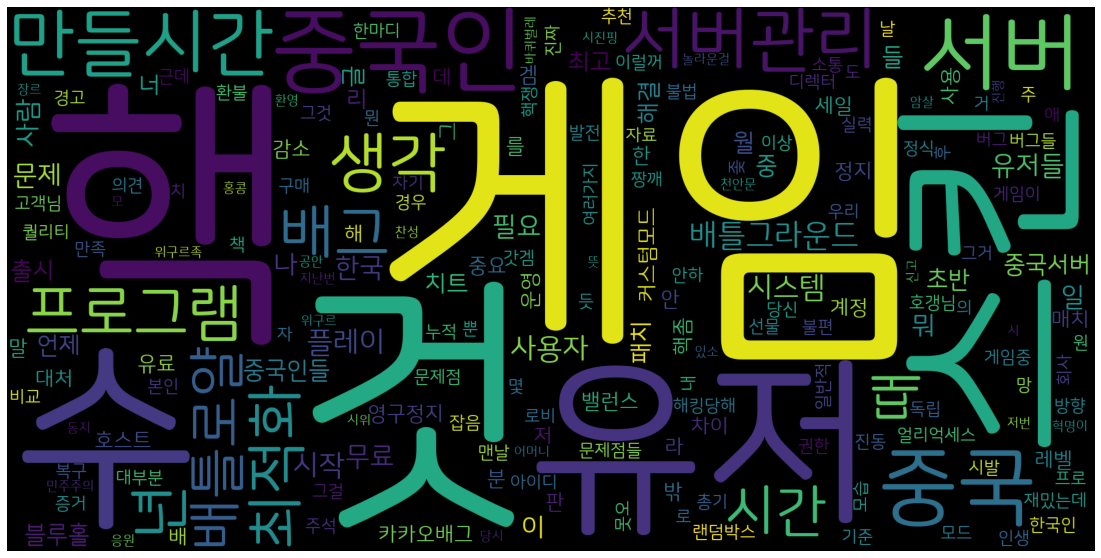

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    font_path='NanumSquareRoundR.ttf',
    width=2000,
    height=1000
).generate_from_frequencies(words)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

# 기타

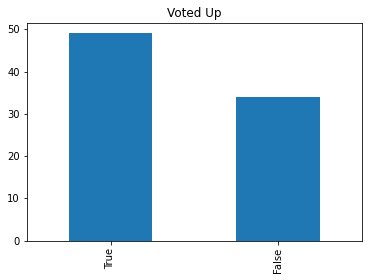

In [ ]:
df['voted_up'].value_counts().plot(kind='bar', title='Voted Up')

In [ ]:
import json

total_playtime = 0

for i in range(len(df)):
    playtime = df.iloc[0]['author']['playtime_forever']

    total_playtime += playtime

print('전체 플레이타임 합계 (분)', total_playtime)
print('전체 플레이타임 합계 (시간)', total_playtime / 60)
print('평균 플레이타임 (시간)', total_playtime / len(df) / 60)

전체 플레이타임 합계 (분) 1386017
전체 플레이타임 합계 (시간) 23100.283333333333
평균 플레이타임 (시간) 278.31666666666666


In [ ]:
df.iloc[0]['author']['playtime_forever']

16699